In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'/Users/mac/Desktop/churn/customer_churn.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 for total charges

In [3]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df['customerID'].duplicated().sum()

0

In [8]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

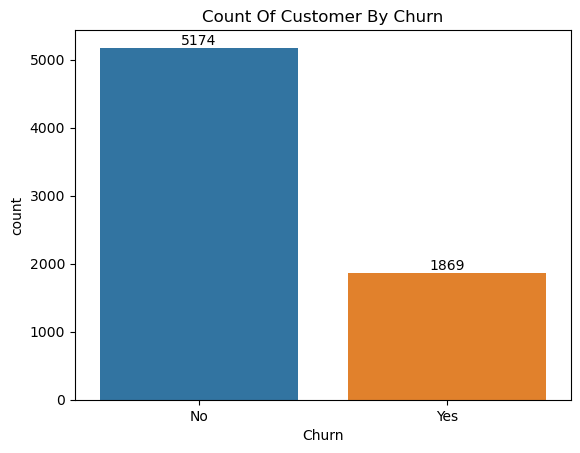

In [9]:
ax = sns.countplot(x='Churn', data = df )
ax.bar_label(ax.containers[0])
plt.title('Count Of Customer By Churn')
plt.show()

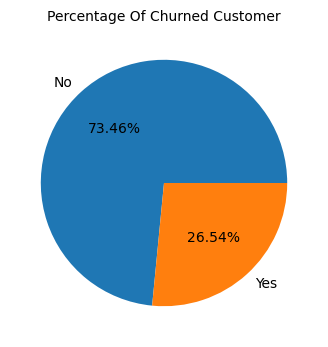

In [10]:
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index , autopct = "%1.2f%%")
plt.title('Percentage Of Churned Customer', fontsize = 10)
plt.show()

In [11]:
# from this pie chart 26.54% of customer have churned out.. let's explore the reason behind it

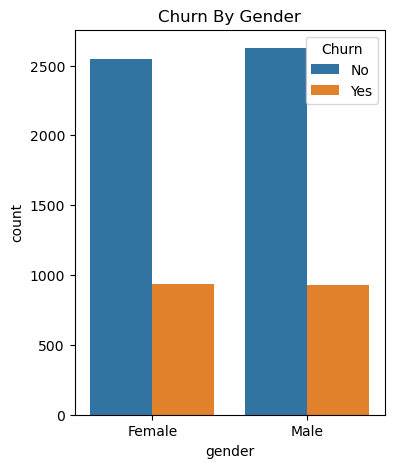

In [12]:
plt.figure(figsize = (4,5))
sns.countplot(x='gender', data = df, hue = 'Churn')
plt.title('Churn By Gender')
plt.show()

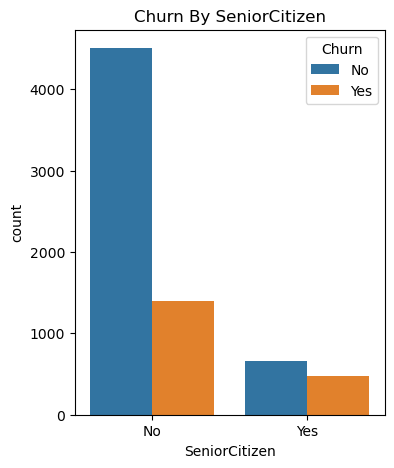

In [13]:
plt.figure(figsize = (4,5))
sns.countplot(x= 'SeniorCitizen', data = df, hue= 'Churn')
plt.title('Churn By SeniorCitizen')
plt.show()

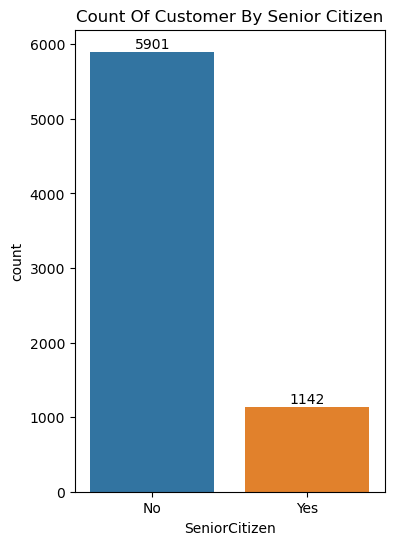

In [14]:
plt.figure(figsize = (4,6))
ax = sns.countplot(x='SeniorCitizen', data = df )
ax.bar_label(ax.containers[0])
plt.title('Count Of Customer By Senior Citizen')
plt.show()

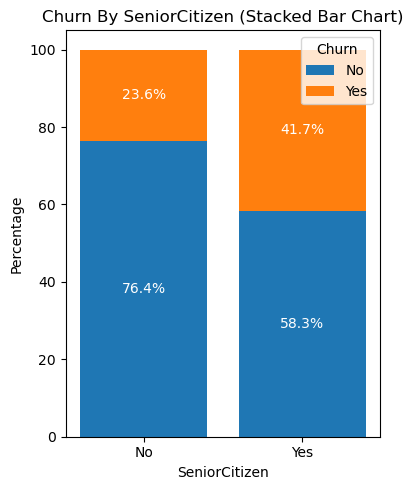

In [15]:
# Calculate counts for each group
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])
percentages = counts.div(counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(4,5))
bars = []
bottoms = [0] * len(percentages)

for churn_status in percentages.columns:
    bars.append(ax.bar(
        percentages.index,  # X-axis labels
        percentages[churn_status],  # Heights (percentages)
        bottom=bottoms,  # Start each bar above the previous segment
        label=churn_status
    ))
    bottoms += percentages[churn_status]  # Update bottoms for next segment

# Add percentage labels
for bar_group, churn_status in zip(bars, percentages.columns):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on zero-height segments
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha='center', va='center', color='white'
            )

# Customizations
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.set_title('Churn By SeniorCitizen (Stacked Bar Chart)')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

#comparative a greater percentage of people in senior citizen category have churned

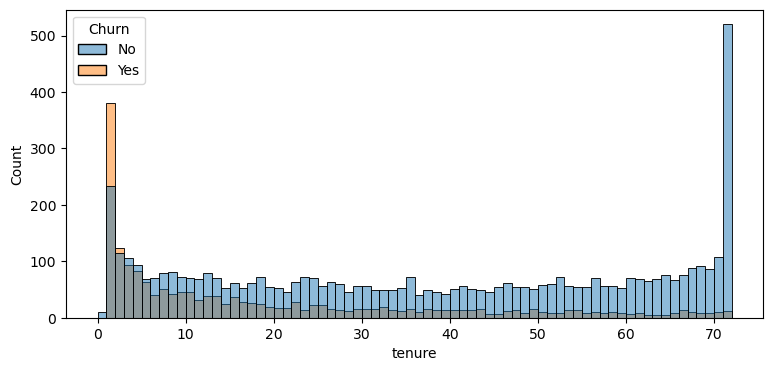

In [17]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data =df, bins = 72 , hue = 'Churn')
plt.show()

#people who have used our service for a long time have stay and people who have used our 1 or 2 months service have churned.

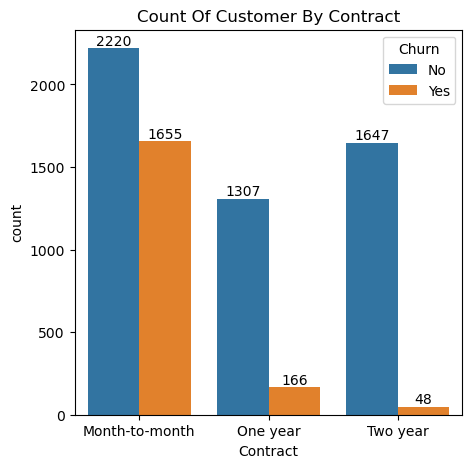

In [45]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Contract', data = df , hue = 'Churn')
plt.title('Count Of Customer By Contract')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#people who have month-to-month contract likely to churn then from those who have 1 or 2 years of contract

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

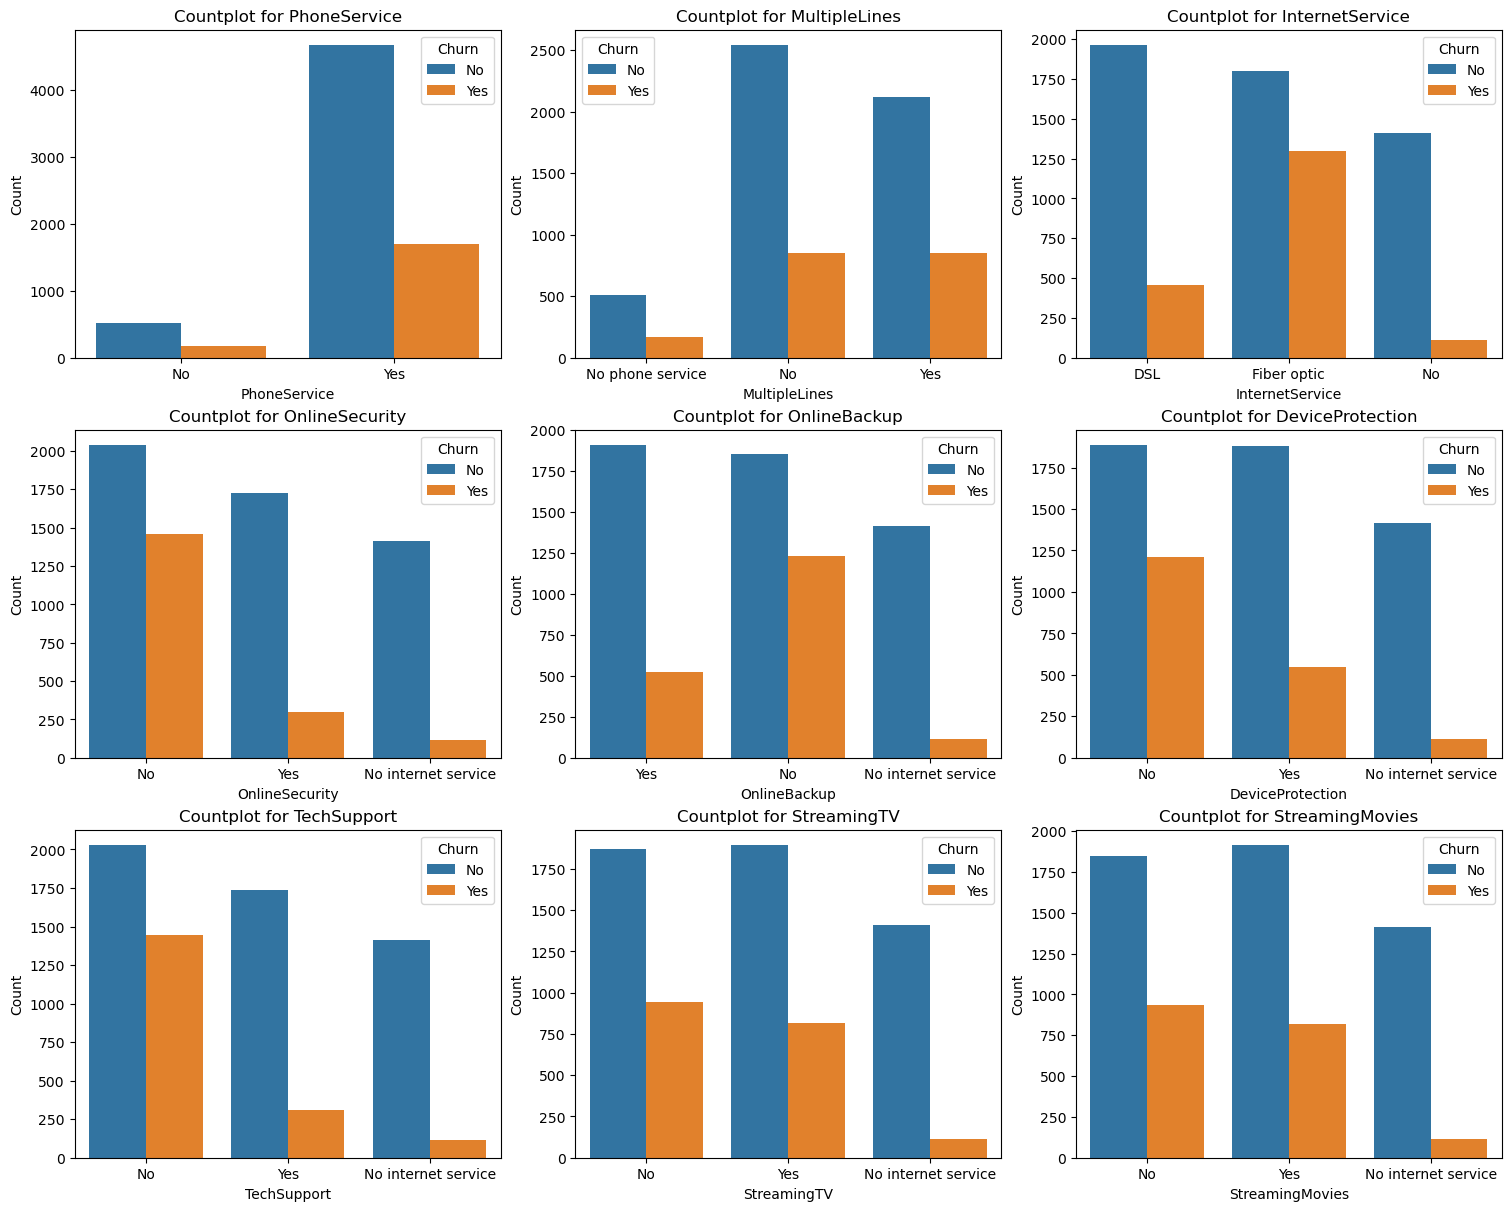

In [34]:

# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of rows and columns for subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols,figsize=(15, n_rows *4),  constrained_layout=True)
axes = axes.flatten()  # Flatten the grid for easy iteration

# Plot each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i] , hue = df['Churn'])
    axes[i].set_title(f'Countplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Turn off unused subplots
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)


plt.show()


#The plots show that churn rates are higher for customers who lack services like OnlineSecurity, TechSupport, and DeviceProtection. Fiber optic users also exhibit higher churn compared to DSL users.

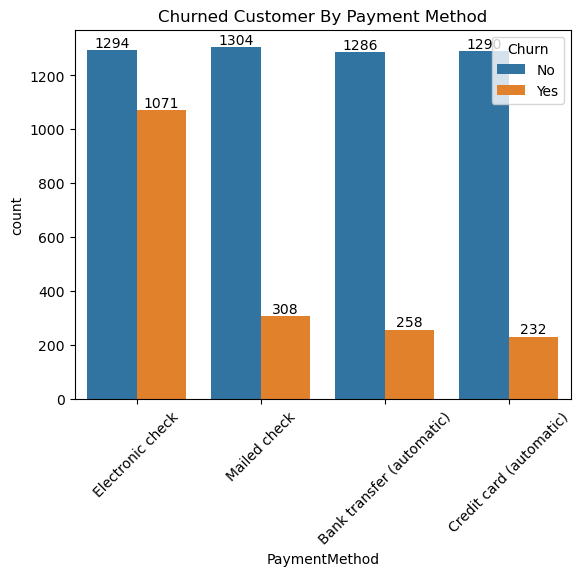

In [46]:

ax = sns.countplot(x = 'PaymentMethod' , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title('Churned Customer By Payment Method')
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method